<a href="https://colab.research.google.com/github/christiano1974/portifolios-trabalho/blob/main/C%C3%B3pia_de_Regress%C3%A3o_linear_treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.core.generic import InvalidIndexError
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
import os

In [ ]:
dados = pd.read_csv('/content/anos_salarios.csv',sep=';',encoding = 'latin-1')

In [ ]:
dados.head()

,anos de exeperência,Salária anual R$
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43252
4,2.2,39891


In [ ]:
dados.isnull().sum()

anos de exeperência    0
Salária anual R$       0
dtype: int64

In [ ]:
dados.dtypes

anos de exeperência    float64
Salária anual R$         int64
dtype: object

In [ ]:
X = dados.iloc[:,0].values
y = dados.iloc[:,1].values

In [ ]:
X = X.reshape(-1,1)

In [ ]:
mod = LinearRegression()
mod.fit(X,y)


LinearRegression()

In [ ]:
print(mod.intercept_)
print(mod.coef_)

30165.804077103552
[7576.0110365]


Text(0.5, 1.0, 'Gráfico de dispersão anos e salários')

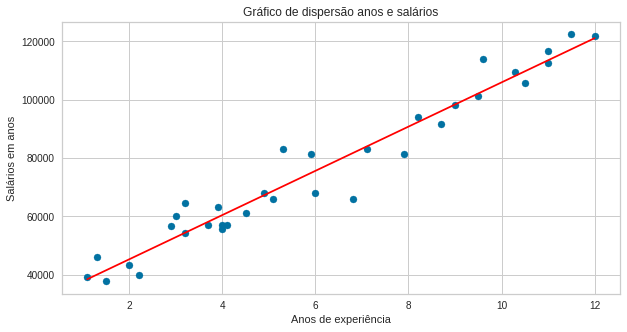

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X,y);
plt.plot(X,mod.predict(X),color = 'red');
plt.xlabel('Anos de experiência')
plt.ylabel('Salários em anos')
plt.title('Gráfico de dispersão anos e salários')

In [ ]:
correlacao = np.corrcoef(dados.iloc[:,0].values,dados.iloc[:,1].values)
correlacao

array([[1.        , 0.97367059],
       [0.97367059, 1.        ]])

In [ ]:
previsoes = mod.predict(X)
previsoes

array([ 38499.41621725,  40014.61842455,  41529.82063185,  45317.8261501 ,
        46833.0283574 ,  52136.23608295,  52893.8371866 ,  54409.0393939 ,
        54409.0393939 ,  58197.04491215,  59712.24711945,  60469.8482231 ,
        60469.8482231 ,  61227.44932675,  64257.85374135,  67288.25815594,
        68803.46036324,  70318.66257054,  74864.26919244,  75621.87029609,
        81682.67912529,  83955.48243624,  90016.29126544,  92289.09457639,
        96077.10009464,  98349.90340559, 102137.90892384, 102895.51002749,
       108198.71775303, 109713.91996033, 113501.92547858, 113501.92547858,
       117289.93099683, 121077.93651508])

In [ ]:
mod.score(X,y)

0.9480344134635886

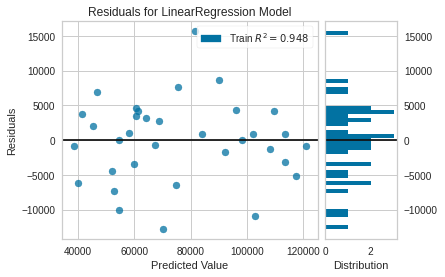

In [ ]:
visualizador = ResidualsPlot(mod)
visualizador.fit(X,y)
visualizador.poof()

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(y,previsoes)

0.9480344134635886

In [ ]:
mod.score(X,y)

0.9480344134635886

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print(mean_absolute_error(y,previsoes))
print(np.sqrt(mean_absolute_error(y,previsoes)))

4422.368289121719
66.5008893859452


In [ ]:
dados.columns

Index(['anos de exeperência', 'Salária anual R$'], dtype='object')

In [ ]:
X1 = dados['anos de exeperência']
y1 = dados['Salária anual R$']
X_sm = sm.add_constant(X1)
results = sm.OLS(y1, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Salária anual R$   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     583.8
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           4.06e-22
Time:                        13:58:34   Log-Likelihood:                -342.89
No. Observations:                  34   AIC:                             689.8
Df Residuals:                      32   BIC:                             692.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.017e+04   2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
residuos = y - previsoes


In [ ]:
import scipy.stats as stats
w, p_valor = stats.shapiro(residuos)
print('O valor do teste de shpiro-wilks é = ' + str(w))
print('O p - valor do teste de shapiro-wilks é = ' + str(p_valor))

O valor do teste de shpiro-wilks é = 0.9792999029159546
O p - valor do teste de shapiro-wilks é = 0.7506269216537476


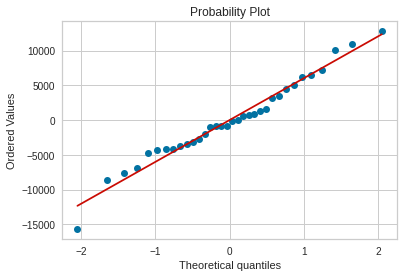

In [ ]:
import pylab
stats.probplot(residuos,dist ="norm",plot = pylab)
pylab.show()